In [101]:
"""
Created on 2/11/19

@author: ivanchen

"""
"""
Created on 2/6/19

@author: ivanchen

"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lightfm import LightFM
from lightfm.evaluation import precision_at_k,auc_score
import scipy
import time
import math
from lightfm.data import Dataset

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [96]:
import sys
sys.path.append("/Users/ivanchen/Desktop/MSIA/Courses/Blog/git/Yelp-Recommender/")
import Rec_fx as rf

In [32]:
# read in data
data_users = pd.read_csv('/Users/ivanchen/Desktop/MSIA/Courses/Blog/git/users_toronto.csv',index_col=0)
data_business = pd.read_csv('/Users/ivanchen/Desktop/MSIA/Courses/Blog/git/Yelp-Recommender/business.csv',index_col=0)
data_review = pd.read_csv('/Users/ivanchen/Desktop/MSIA/Courses/Blog/git/reviews_toronto.csv',index_col=0)

In [30]:
print(data_review.shape)
print(data_users.shape)
print(data_business.shape)


(422050, 9)
(92381, 24)
(10093, 24)


In [19]:
## EDA 
#look at users
data_users.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,fans,friends,funny,name,review_count,useful,user_id,yelping_since,is_elite,year
0,3.60,5,0,5,1,0,0,4,3,11,...,9,"CfGCj80EdA-xS-mTWlAn4Q, JgD2Rk9K07MkZgG7Nb9YzA...",26,Peter,47,57,gvXtMj3XuPr0xHjgmlmtng,2014-01-05 20:45:54,True,2014
1,3.45,64,0,64,16,0,8,42,10,32,...,71,"tRC9YLo4LHquMVXZ9VO4Ag, -YpfTgz88rsPwsOvlfKn7w...",1007,Javier,470,1655,pU6GoRTcl1rIOi6zMynjog,2011-12-16 16:13:01,True,2011
2,4.31,23,5,23,10,4,6,21,1,39,...,13,"o8H8CioXzL4ZR_zxZYcv3Q, yJB1hHDIq18Qvmo3yo9_KA...",316,allison,391,708,_ICqwy7SW8J6OJBab1HkwA,2007-10-06 02:42:28,True,2007
3,3.95,201,1,201,146,0,22,163,112,118,...,58,"HHmX2L4Gg6L0WJNcxs4Ptw, 8DEyKVyplnOcSKx39vatbg...",1338,Fred,431,3157,rnU1EFMSnVJGrQxrnjaODg,2010-12-28 01:37:20,True,2010
4,3.64,4,0,4,9,0,4,2,5,4,...,24,"4I_AqfW1E_OLDskrgxxU0Q, 0hm1__RgRWYvHXxWfUJMyA...",175,Christopher,318,400,AsYMm_O4H-mwmWbmeACDHw,2015-01-17 17:04:09,True,2015


In [20]:
data_users.describe()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,fans,funny,review_count,useful,year
count,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000
mean,3.559019,5.640803,0.310194,5.640803,3.748855,0.177894,0.582512,2.611922,1.876609,6.013931,0.425001,2.248677,40.669640,2.530250,31.681298,33.631807,70.635661,2013.552549
std,1.060362,133.675306,11.661069,133.675306,112.101491,9.290651,15.429126,44.738893,71.549861,125.363341,23.824390,45.181440,621.800074,25.105661,524.225249,137.028649,759.122721,2.514763
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2004.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2012.000000
50%,3.730000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.000000,3.000000,2014.000000
75%,4.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,4.000000,18.000000,16.000000,2015.000000
max,5.000000,23733.000000,2401.000000,23733.000000,23891.000000,2261.000000,3575.000000,4901.000000,12732.000000,11579.000000,5660.000000,7022.000000,82128.000000,2383.000000,86122.000000,12390.000000,89418.000000,2018.000000


In [21]:
data_users.columns

Index(['average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool',
       'elite', 'fans', 'friends', 'funny', 'name', 'review_count', 'useful',
       'user_id', 'yelping_since', 'is_elite', 'year'],
      dtype='object')

In [104]:
data_users.isnull().sum()

average_stars             0
compliment_cool           0
compliment_cute           0
compliment_funny          0
compliment_hot            0
compliment_list           0
compliment_more           0
compliment_note           0
compliment_photos         0
compliment_plain          0
compliment_profile        0
compliment_writer         0
cool                      0
elite                 84104
fans                      0
friends                   0
funny                     0
name                      0
review_count              0
useful                    0
user_id                   0
yelping_since             0
is_elite                  0
year                      0
dtype: int64

In [23]:
# look at businesses
data_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,BikeParking,RestaurantsReservations,OutdoorSeating,RestaurantsDelivery,RestaurantsPriceRange2,RestaurantsAttire,NoiseLevel,HasTV,RestaurantsGoodForGroups,GoodForKids
0,C9oCPomVP0mtKa8z99E3gg,Bakery Gateau,"865 York Mills Road, Unit 1",Toronto,ON,M3B 1Y6,43.754093,-79.349548,4.5,8,...,True,NaN,NaN,False,2.0,NaN,NaN,NaN,NaN,NaN
1,NDuUMJfrWk52RA-H-OtrpA,Bolt Fresh Bar,1170 Queen Street W,Toronto,ON,M6J 1J5,43.642889,-79.425429,3.0,57,...,True,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
2,SP_YXIEwkFPPl_9anCYmpQ,The Steady Cafe & Bar,1051 Bloor Street W,Toronto,ON,M6H 1M4,43.660494,-79.432099,3.5,29,...,True,True,False,False,2.0,u'casual',u'average',False,True,False
3,mlHC2XcU9Bows6cnYEmRgg,Mad Crush Wine Bar,582 College Street,Toronto,ON,M6G 1B3,43.655420,-79.413352,4.0,9,...,True,True,True,False,3.0,'dressy',NaN,False,True,False
4,RFbMVekR8lU9tPJ8sWrwHg,Tavolino,619 Mount Pleasant Road,Toronto,ON,M4S 2M5,43.704229,-79.388230,4.0,18,...,True,True,False,NaN,2.0,u'casual',u'quiet',False,True,False


In [24]:
data_business.describe()

,latitude,longitude,stars,review_count
count,10093.000000,10093.000000,10093.000000,10093.000000
mean,43.681057,-79.392436,3.464629,40.679976
std,0.046194,0.061268,0.761838,76.631472
min,43.592327,-79.703390,1.000000,3.000000
25%,43.650806,-79.418194,3.000000,6.000000
50%,43.664176,-79.393529,3.500000,15.000000
75%,43.696332,-79.371987,4.000000,43.000000
max,43.876501,-79.137178,5.000000,2121.000000


In [25]:
data_business.isnull().sum()

business_id                    0
name                           0
address                       58
city                           0
state                          0
postal_code                   38
latitude                       0
longitude                      0
stars                          0
review_count                   0
category                       0
WiFi                        3849
RestaurantsTakeOut          1889
Alcohol                     4127
BikeParking                 3560
RestaurantsReservations     3465
OutdoorSeating              3021
RestaurantsDelivery         3403
RestaurantsPriceRange2      1261
RestaurantsAttire           3754
NoiseLevel                  4476
HasTV                       4098
RestaurantsGoodForGroups    3316
GoodForKids                 3438
dtype: int64

In [33]:
# look at reviews
data_review.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,year
0,AakkkTuGZA2KBodKi2_u8A,0,2012-07-16 00:37:14,1.0,JVcjMhlavKKn3UIt9p9OXA,1.0,I cannot believe how things have changed in 3 ...,1.0,TpyOT5E16YASd7EWjLQlrw,2012
1,YvrylyuWgbP90RgMqZQVnQ,0,2017-04-07 21:27:49,0.0,svK3nBU7Rk8VfGorlrN52A,5.0,You can't really find anything wrong with this...,0.0,NJlxGtouq06hhC7sS2ECYw,2017
2,y-Iw6dZflNix4BdwIyTNGA,0,2014-06-27 21:19:23,0.0,4bUyL7lzoWzDZaJETAKREg,3.0,Good selection of classes of beers and mains. ...,0.0,_N7Ndn29bpll_961oPeEfw,2014
3,YSUcHqlKMPHHJ_cTrqtNrA,0,2017-12-29 13:55:19,0.0,E6B-2U2sGG3xgmnNWZAEew,1.0,Came here on a Thursday night at 6:30 p.m. My ...,0.0,DbccYu3OppWKl21OanZnTg,2017
4,jzveTy7ogH7cg9axZ78ENg,0,2015-04-01 13:31:35,0.0,0NRNA8qIq9nKw5FcwyOxcQ,4.0,Very nice eating environment and the food are ...,0.0,54kpqrxF9DEPpwa51hO_Bw,2015


In [35]:
data_review.text[0]

"I cannot believe how things have changed in 3 years. I picked up duck congee sometime in the winter when my hubby was sick.  I was very disappointed because the ginger fish sauce tasted like it had gone bad (it should never be bitter).  Today, my hubby wanted to eat there since he was craving the duck congee and most places don't serve the duck & coleslaw side. We waited about 10 minutes to get our menu.  After we placed our orders, we waited another 5 minutes to get the tea that most places bring with the menu.  I could go on with the details but the gist of the story is they were understaffed or the staff was slow.  The worst part of it was that the service.  The servers make us feel bad for asking for anything (like when they took our order).  We had arrived and placed our order before another couple bside us at least 10 minutes ahead but somehow, this couple received their pho before mine.  They were almost done eating their pho before mine came out."

In [36]:
data_review.describe()# need log cool,funny and useful

,cool,funny,stars,useful,year
count,422050.000000,422050.000000,422050.000000,422050.000000,422050.000000
mean,0.515505,0.376747,3.626194,1.108795,2015.000218
std,2.043843,1.550754,1.267724,2.670413,2.399685
min,0.000000,0.000000,1.000000,0.000000,2007.000000
25%,0.000000,0.000000,3.000000,0.000000,2013.000000
50%,0.000000,0.000000,4.000000,0.000000,2015.000000
75%,1.000000,0.000000,5.000000,1.000000,2017.000000
max,177.000000,193.000000,5.000000,188.000000,2018.000000


In [45]:
data_review.cool = pd.Series([math.log(x+1) for x in data_review.cool])
data_review.useful = pd.Series([math.log(x+1) for x in data_review.useful])
data_review.funny = pd.Series([math.log(x+1) for x in data_review.funny])


In [46]:
data_review.describe()

,cool,funny,stars,useful,year
count,422050.000000,422050.000000,422050.000000,422050.000000,422050.000000
mean,0.241465,0.174634,3.626194,0.484872,2015.000218
std,0.472046,0.422242,1.267724,0.629168,2.399685
min,0.000000,0.000000,1.000000,0.000000,2007.000000
25%,0.000000,0.000000,3.000000,0.000000,2013.000000
50%,0.000000,0.000000,4.000000,0.000000,2015.000000
75%,0.693147,0.000000,5.000000,0.693147,2017.000000
max,5.181784,5.267858,5.000000,5.241747,2018.000000


(array([3.16356e+05, 6.47680e+04, 2.98780e+04, 7.64300e+03, 2.55700e+03,
        3.81000e+02, 2.20000e+02, 1.39000e+02, 1.05000e+02, 3.00000e+00]),
 array([0.        , 0.51817836, 1.03635671, 1.55453507, 2.07271342,
        2.59089178, 3.10907013, 3.62724849, 4.14542684, 4.6636052 ,
        5.18178355]),
 <a list of 10 Patch objects>)

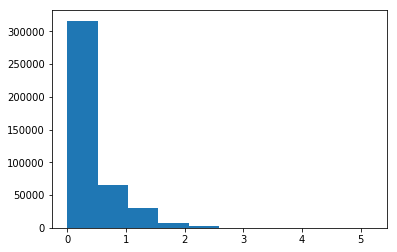

In [47]:
plt.hist(data_review.cool)# still very skewed

(array([3.46833e+05, 4.59420e+04, 2.03100e+04, 6.67700e+03, 1.42800e+03,
        5.28000e+02, 2.49000e+02, 7.50000e+01, 6.00000e+00, 2.00000e+00]),
 array([0.        , 0.52678582, 1.05357163, 1.58035745, 2.10714326,
        2.63392908, 3.1607149 , 3.68750071, 4.21428653, 4.74107234,
        5.26785816]),
 <a list of 10 Patch objects>)

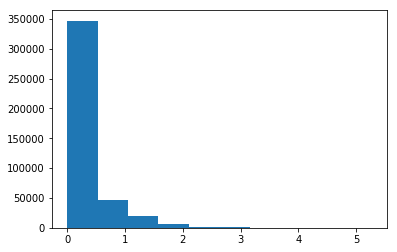

In [48]:
plt.hist(data_review.funny)

(array([2.32405e+05, 9.22760e+04, 6.44810e+04, 2.56480e+04, 5.18700e+03,
        1.41400e+03, 3.46000e+02, 1.60000e+02, 1.31000e+02, 2.00000e+00]),
 array([0.        , 0.5241747 , 1.0483494 , 1.5725241 , 2.09669881,
        2.62087351, 3.14504821, 3.66922291, 4.19339761, 4.71757231,
        5.24174702]),
 <a list of 10 Patch objects>)

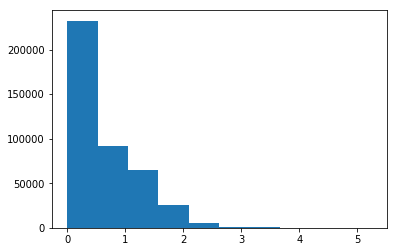

In [49]:
plt.hist(data_review.useful)

In [54]:
#look to see if has duplicated reviews
a = data_review.groupby(['business_id','user_id']).agg(['count']).reset_index()

In [59]:
a['useful'].sort_values(by = 'count',ascending = False)[0:50]

,count
232869,12
9847,11
171596,11
144972,10
409258,9
161847,9
217329,9
176844,9
394609,9
374353,9


In [68]:
a.loc[232869,:]

business_id           _kgk_9chyFpTWbSbPoY8YA
user_id               YBT3EKUNN4IP8m4x7sGu1g
cool         count                        12
date         count                        12
funny        count                        12
review_id    count                        12
stars        count                        12
text         count                        12
useful       count                        12
year         count                        12
Name: 232869, dtype: object

In [98]:
tmp = data_review[(data_review.user_id == a.loc[232869,'user_id'][0]) &
           (data_review.business_id == a.loc[232869,'business_id'][0])]

In [115]:
tmp.sort_values(by = 'date',ascending = True)# Have duplicate comment values. Not sure what would happen

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,year
83961,_kgk_9chyFpTWbSbPoY8YA,0.693147,2016-01-04 18:21:04,0.000000,a0UkxC4tprjAJw7UDtcj0g,3.0,The pros:\n* Good kimchi chigae;\n* Polite wai...,1.098612,YBT3EKUNN4IP8m4x7sGu1g,2016
96963,_kgk_9chyFpTWbSbPoY8YA,1.098612,2016-03-11 12:15:50,0.000000,Xajb18LbHqKzEXfG0xP1AA,3.0,How I really want to love this place.\n\nThe s...,1.386294,YBT3EKUNN4IP8m4x7sGu1g,2016
111602,_kgk_9chyFpTWbSbPoY8YA,1.098612,2016-04-09 23:50:51,0.000000,jEjifeE-ss1fbHYoQI5M2w,4.0,I decided to give this place another go. And ...,0.693147,YBT3EKUNN4IP8m4x7sGu1g,2016
106650,_kgk_9chyFpTWbSbPoY8YA,0.693147,2016-04-18 18:32:58,0.000000,AFUIG9HPr81MRZXPYt2E2Q,3.0,Had the sundae-kuk.\n\nNot the best I have eve...,1.386294,YBT3EKUNN4IP8m4x7sGu1g,2016
89084,_kgk_9chyFpTWbSbPoY8YA,0.693147,2016-07-16 16:47:33,0.000000,yQ1uTo_xwuVDSt_nHm-QLw,4.0,New ownership and this place has improved sign...,0.693147,YBT3EKUNN4IP8m4x7sGu1g,2016
97678,_kgk_9chyFpTWbSbPoY8YA,0.693147,2016-07-28 23:25:16,0.000000,BPjT5Cj0_XMRicHcZd0SHg,5.0,Yes!\n\nWow!\n\nMmm mmm. \n\n100% improved ev...,0.693147,YBT3EKUNN4IP8m4x7sGu1g,2016
91859,_kgk_9chyFpTWbSbPoY8YA,0.693147,2016-08-26 23:26:36,0.000000,9YcS5F_BtyQ53HcrdIQpYQ,5.0,This place has improved a lot in the past few ...,0.693147,YBT3EKUNN4IP8m4x7sGu1g,2016
93516,_kgk_9chyFpTWbSbPoY8YA,0.693147,2016-09-09 01:37:22,0.000000,9jaeCAUKAXSk_J4z70pLzA,3.0,I feel very guilty downgrading this restaurant...,0.693147,YBT3EKUNN4IP8m4x7sGu1g,2016
88974,_kgk_9chyFpTWbSbPoY8YA,0.693147,2017-07-20 22:26:58,0.000000,oSx9TMB4_1PLVnbjgMn-PQ,5.0,Luscious. Had the nackzi-bokkum. Nicely done ...,0.693147,YBT3EKUNN4IP8m4x7sGu1g,2017
95852,_kgk_9chyFpTWbSbPoY8YA,0.693147,2017-08-11 22:09:18,0.000000,N-C2a14El7s2QxGpzfLWvw,5.0,The B.E.S.T. chapsal sundae this side of the P...,0.693147,YBT3EKUNN4IP8m4x7sGu1g,2017


In [103]:
#model
dataset = Dataset()
dataset.fit(data_review.user_id,data_review.business_id)
type(dataset)
num_users, num_items = dataset.interactions_shape()
print('Num users: {}, num_items {}.'.format(num_users, num_items))


Num users: 92381, num_items 10093.


In [105]:
# fit item and user features. 
dataset.fit_partial(items=data_business.business_id,
                    item_features=data_business.stars)
dataset.fit_partial(items=data_business.business_id,
                    item_features=data_business.longitude)
dataset.fit_partial(items=data_business.business_id,
                    item_features=data_business.latitude)
dataset.fit_partial(items=data_business.business_id,
                    item_features=data_business.review_count)

dataset.fit_partial(users=data_users.user_id,
                    user_features=data_users.average_stars)
dataset.fit_partial(users=data_users.user_id,
                    user_features=data_users.review_count)
dataset.fit_partial(users=data_users.user_id,
                    user_features=data_users.is_elite)
dataset.fit_partial(users=data_users.user_id,
                    user_features=data_users.useful)


# Check data
print(type(dataset))
print(dataset.model_dimensions())
print(dataset.user_features_shape())
print(dataset.item_features_shape())
#print(dataset.mapping())
print(dataset.interactions_shape())



<class 'lightfm.data.Dataset'>
(94706, 28064)
(92381, 94706)
(10093, 28064)
(92381, 10093)


In [107]:
#build interaction
(interactions, weights) = dataset.build_interactions([(x['user_id'],
                                                       x['business_id'],
                                                       x['stars']) for index,x in data_review.iterrows()])

print(repr(interactions))

#item features
item_info_copy=data_business.iloc[[i for i in range(data_business.shape[0]) 
                                   if data_business.business_id[i] in data_review.business_id.unique()],:]
print(item_info_copy.shape)
#item_features = dataset.build_item_features(((x['item'], [x['category']])
 #                                             for index,x in data_meta.iterrows()))
    

"""
Build a item features matrix out of an iterable of the form (item id, [list of feature names]) or (item id, {feature name: feature weight}).

Parameters:	
data (iterable of the form) – (item id, [list of feature names]) or (item id, {feature name: feature weight}). Item and feature ids will be translated to internal indices constructed during the fit call.
normalize (bool, optional) – If true, will ensure that feature weights sum to 1 in every row.
Returns:	
feature matrix – Matrix of item features.

Return type:	
CSR matrix (num items, num features)
"""    
    
item_features = dataset.build_item_features(((x['business_id'], 
                                              [x['stars'],x['longitude'],x['latitude'],x['review_count']])
                                              for index,x in item_info_copy.iterrows()))
user_features = dataset.build_user_features((x['user_id'],
                                             [x['average_stars'],x['review_count'],x['is_elite'],x['useful']])
                                           for index, x in data_users.iterrows())

print(repr(item_features))
print(item_features.shape)

print(repr(user_features))
print(user_features.shape)

<92381x10093 sparse matrix of type '<class 'numpy.int32'>'
	with 422050 stored elements in COOrdinate format>
(10093, 24)
<10093x28064 sparse matrix of type '<class 'numpy.float32'>'
	with 50131 stored elements in Compressed Sparse Row format>
(10093, 28064)
<92381x94706 sparse matrix of type '<class 'numpy.float32'>'
	with 425025 stored elements in Compressed Sparse Row format>
(92381, 94706)


In [110]:
#train-test split
type(interactions)
train, test, user_index = rf.train_test_split(interactions.tocsr(), 5, fraction=0.3)

print('The dataset has %s users and %s items, '
      'with %s interactions in the test and %s interactions in the training set.'
      % (train.shape[0], train.shape[1], test.getnnz(), train.getnnz()))

from lightfm.cross_validation import random_train_test_split
train,test=random_train_test_split(interactions,test_percentage=0.2,random_state=np.random.RandomState(123))

print('The dataset has %s users and %s items, '
      'with %s interactions in the test and %s interactions in the training set.'
      % (train.shape[0], train.shape[1], test.getnnz(), train.getnnz()))



Not enough users with > 10 interactions for fraction of 0.3


ValueError: Cannot take a larger sample than population when 'replace=False'